In [29]:
import numpy
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.layers.convolutional import Convolution2D
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")



In [30]:
#reads the train and test csv
train_data=pd.read_csv("Train_data.csv",encoding='utf-8')
test_data=pd.read_csv("test_data.csv",encoding='utf-8')
print("Train data shape(rows,col)==>",train_data.shape)
print("Test data shape(rows,cols)==>",test_data.shape)


Train data shape(rows,col)==> (125973, 42)
Test data shape(rows,cols)==> (10000, 42)


In [31]:
#concat of train and test data==>datatt
data_tt=pd.concat([train_data,test_data],axis=0)
data_tt.head()
print("concatenated data shape(rows,cols)==>",data_tt.shape)

concatenated data shape(rows,cols)==> (135973, 42)


In [32]:
data_tt.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,20,2,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,45,2,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,icmp,50,4,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,icmp,25,2,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,icmp,25,2,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [33]:
#the value in protocol are icmp,udp,tcp they are changed to 0,1,2
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
data_tt['protocol_type']=LE.fit_transform(data_tt['protocol_type'])

In [34]:
data_tt.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,0,20,2,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,2,45,2,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,0,50,4,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,0,25,2,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,0,25,2,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [35]:
# x and y are assigned
y = data_tt.xAttack                    # M or B 
x = data_tt.iloc[:,:-1]

In [36]:
y

0       normal
1       normal
2          dos
3       normal
4       normal
5          dos
6          dos
7          dos
8          dos
9          dos
10         dos
11         dos
12      normal
13         r2l
14         dos
15         dos
16      normal
17       probe
18      normal
19      normal
20         dos
21         dos
22      normal
23      normal
24         dos
25      normal
26         dos
27      normal
28      normal
29      normal
         ...  
9970       r2l
9971       r2l
9972       dos
9973     probe
9974    normal
9975     probe
9976       dos
9977     probe
9978       r2l
9979       dos
9980       dos
9981       dos
9982       r2l
9983       r2l
9984     probe
9985     probe
9986       dos
9987       dos
9988       dos
9989       dos
9990       r2l
9991    normal
9992       dos
9993    normal
9994    normal
9995    normal
9996    normal
9997    normal
9998    normal
9999       r2l
Name: xAttack, Length: 135973, dtype: object

In [37]:
from keras.utils import np_utils
encoder=LabelEncoder()
encoder.fit(y)
y=encoder.transform(y)
y_true=y
y

array([1, 1, 0, ..., 1, 1, 3])

In [38]:
import numpy as np
from keras.utils import to_categorical

def encode(y):
    print('Shape of data (BEFORE encode): %s' % str(y.shape))
    encoded = to_categorical(y)
    print('Shape of data (AFTER  encode): %s\n' % str(encoded.shape))
    return encoded

In [39]:
dummy_y = encode(y)
print(dummy_y)

Shape of data (BEFORE encode): (135973,)
Shape of data (AFTER  encode): (135973, 5)

[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]


In [40]:
selected_20=['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'hot', 'logged_in', 'count', 'srv_count',
       'rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate']

In [41]:
X_=x[selected_20]

In [42]:
print("x shape ============>",X_.shape)

x shape ============> (135973, 20)


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

In [44]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X_, dummy_y, test_size = 0.08, random_state = 0)

In [45]:
dummy_y.shape
X_test.shape

(10878, 20)

In [46]:
from keras.models import Sequential
from keras.layers import Dense
classifier = Sequential() # Initialising the CNN

classifier.add(Dense(units = 100, kernel_initializer = 'uniform', activation = 'relu', input_dim = 20))
classifier.add(Dense(units = 50, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 25, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'sigmoid'))

# compile ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()
# Fitting the data


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               2100      
_________________________________________________________________
dense_6 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_7 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 130       
Total params: 8,555
Trainable params: 8,555
Non-trainable params: 0
_________________________________________________________________


In [47]:
hisroy =classifier.fit(X_train, y_train, batch_size = 100, epochs = 15)


Epoch 1/15
125095/125095 [==============================] - 2s 16us/step - loss: 0.1612 - acc: 0.9611
Epoch 2/15
125095/125095 [==============================] - 2s 14us/step - loss: 0.0818 - acc: 0.9841
Epoch 3/15
125095/125095 [==============================] - 2s 15us/step - loss: 0.0712 - acc: 0.9868
Epoch 4/15
125095/125095 [==============================] - 2s 14us/step - loss: 0.0715 - acc: 0.9884
Epoch 5/15
125095/125095 [==============================] - 2s 15us/step - loss: 0.0525 - acc: 0.9879
Epoch 6/15
125095/125095 [==============================] - 2s 14us/step - loss: 0.0349 - acc: 0.9892
Epoch 7/15
125095/125095 [==============================] - 2s 14us/step - loss: 0.0317 - acc: 0.9894
Epoch 8/15
125095/125095 [==============================] - 2s 15us/step - loss: 0.0288 - acc: 0.9899
Epoch 9/15
125095/125095 [==============================] - 2s 14us/step - loss: 0.0287 - acc: 0.9899
Epoch 10/15
125095/125095 [==============================] - 2s 14us/step - loss: 

In [125]:
predictions = classifier.predict(X_test)
print(predictions.shape)
print(y_test.shape)
print(predictions)

(10878, 5)
(10878, 5)
[[9.9587440e-04 2.1178005e-02 9.8360622e-01 1.1480366e-09 1.5230147e-06]
 [1.0000000e+00 1.8197250e-07 7.9387291e-10 4.7303876e-14 1.9972200e-17]
 [6.5821675e-13 9.9997628e-01 4.9828069e-11 5.3692312e-04 1.1179168e-04]
 ...
 [6.2747524e-05 9.9988437e-01 6.2315536e-07 9.7485563e-06 1.2286471e-07]
 [1.0545242e-03 9.9252385e-01 1.2003147e-04 6.1893640e-03 2.8651131e-05]
 [1.1278608e-01 8.3880115e-01 8.4939776e-03 2.1605363e-02 1.7365869e-04]]


In [126]:
def decode(predictions):
    return np.argmax(predictions)

In [127]:
for i in range(predictions.shape[0]):
    datum = predictions[i]
    print('index: %d' % i)
    print('encoded datum: %s' % datum)
    decoded_datum = decode(predictions[i])
    print('decoded datum: %s' % decoded_datum)
    print()

index: 0
encoded datum: [9.9587440e-04 2.1178005e-02 9.8360622e-01 1.1480366e-09 1.5230147e-06]
decoded datum: 2

index: 1
encoded datum: [1.0000000e+00 1.8197250e-07 7.9387291e-10 4.7303876e-14 1.9972200e-17]
decoded datum: 0

index: 2
encoded datum: [6.5821675e-13 9.9997628e-01 4.9828069e-11 5.3692312e-04 1.1179168e-04]
decoded datum: 1

index: 3
encoded datum: [1.0000000e+00 1.6168522e-07 5.8637903e-09 1.2245172e-12 1.6938891e-15]
decoded datum: 0

index: 4
encoded datum: [9.9999988e-01 7.2605792e-07 3.1979841e-09 4.4159077e-13 2.8658132e-16]
decoded datum: 0

index: 5
encoded datum: [6.9261255e-08 9.9999976e-01 5.2014548e-09 1.5139060e-06 6.0794583e-09]
decoded datum: 1

index: 6
encoded datum: [7.7982444e-21 1.0000000e+00 9.1164733e-15 6.8533325e-13 3.4010776e-07]
decoded datum: 1

index: 7
encoded datum: [1.5449565e-07 9.9999440e-01 6.6288003e-08 5.2898571e-07 5.4362740e-08]
decoded datum: 1

index: 8
encoded datum: [1.0000000e+00 1.6890976e-08 9.4120223e-10 8.7915786e-14 2.53137

 2.30180798e-03]
decoded datum: 1

index: 417
encoded datum: [4.36262575e-26 1.00000000e+00 2.25325358e-09 1.06192985e-10
 6.91843782e-09]
decoded datum: 1

index: 418
encoded datum: [3.05393769e-04 9.94929969e-01 1.12246846e-04 5.48585376e-04
 5.96615610e-06]
decoded datum: 1

index: 419
encoded datum: [2.8463625e-04 9.9950588e-01 5.7589218e-06 8.3916704e-05 2.6195116e-06]
decoded datum: 1

index: 420
encoded datum: [5.3046165e-06 9.9885154e-01 9.2989030e-05 2.0350204e-03 2.8687164e-05]
decoded datum: 1

index: 421
encoded datum: [4.5203223e-04 9.9668807e-01 3.0682877e-05 1.5605846e-08 1.3697912e-09]
decoded datum: 1

index: 422
encoded datum: [9.9999881e-01 4.0486275e-06 2.9031867e-08 8.6607076e-11 6.1277555e-14]
decoded datum: 0

index: 423
encoded datum: [9.99995708e-01 1.17567715e-05 7.61495130e-07 2.23240558e-11
 6.93218703e-13]
decoded datum: 0

index: 424
encoded datum: [3.1019602e-15 9.9999905e-01 2.3091947e-07 2.8878612e-08 2.5079655e-06]
decoded datum: 1

index: 425
encoded 

encoded datum: [2.5031877e-10 9.9999905e-01 4.4609727e-08 9.1186614e-08 4.1124113e-06]
decoded datum: 1

index: 832
encoded datum: [9.9999928e-01 1.9120209e-06 8.2201304e-08 2.8513297e-10 4.7997988e-13]
decoded datum: 0

index: 833
encoded datum: [4.2694192e-02 9.5087844e-01 4.9623643e-04 3.6899487e-03 3.9963273e-04]
decoded datum: 1

index: 834
encoded datum: [1.05170075e-05 9.99960303e-01 1.28610893e-07 1.44121907e-06
 2.19224788e-07]
decoded datum: 1

index: 835
encoded datum: [3.3571239e-06 9.9997950e-01 1.2849908e-07 2.8720715e-06 3.1433296e-07]
decoded datum: 1

index: 836
encoded datum: [0.37263462 0.60022885 0.02884118 0.06567644 0.01739724]
decoded datum: 1

index: 837
encoded datum: [9.5321332e-07 9.9997187e-01 6.0120146e-07 7.4978310e-08 1.5112906e-07]
decoded datum: 1

index: 838
encoded datum: [1.0018363e-06 9.9982411e-01 2.7085190e-09 3.0116964e-05 7.6188682e-12]
decoded datum: 1

index: 839
encoded datum: [3.0538765e-06 9.9998558e-01 5.1610773e-08 5.1349934e-07 5.8307801

encoded datum: [5.9649829e-33 9.9994195e-01 1.0668321e-07 6.6898414e-05 7.2634713e-05]
decoded datum: 1

index: 1262
encoded datum: [9.9999940e-01 7.8956521e-07 7.2368954e-07 4.0562298e-10 7.6731043e-12]
decoded datum: 0

index: 1263
encoded datum: [9.9999976e-01 1.8179761e-06 5.8962071e-11 3.7264836e-13 1.8766143e-18]
decoded datum: 0

index: 1264
encoded datum: [9.9999857e-01 4.6874752e-06 2.5795092e-08 2.9386594e-11 2.6172656e-14]
decoded datum: 0

index: 1265
encoded datum: [0.0000000e+00 9.9994457e-01 7.7247563e-07 7.6702752e-05 1.1653007e-03]
decoded datum: 1

index: 1266
encoded datum: [1.5403534e-20 1.0000000e+00 7.6572049e-10 2.9809537e-11 2.1440842e-07]
decoded datum: 1

index: 1267
encoded datum: [3.6644397e-07 9.9998677e-01 3.5420015e-08 2.8909506e-07 6.1099648e-08]
decoded datum: 1

index: 1268
encoded datum: [1.6458307e-30 9.9999309e-01 2.1067722e-08 6.0415741e-06 4.4182539e-06]
decoded datum: 1

index: 1269
encoded datum: [9.9999928e-01 1.7349385e-06 7.9061422e-08 2.6943

encoded datum: [6.7399198e-04 6.2905937e-03 9.8633844e-01 1.6381313e-06 6.1973499e-04]
decoded datum: 2

index: 1655
encoded datum: [6.7989536e-06 1.5913431e-05 9.9998748e-01 5.4556861e-09 1.7130996e-06]
decoded datum: 2

index: 1656
encoded datum: [5.4778287e-18 9.9999988e-01 1.7717467e-08 2.8453551e-09 1.0889109e-06]
decoded datum: 1

index: 1657
encoded datum: [3.6303923e-08 9.9999940e-01 1.0580189e-08 1.6227821e-08 3.9189973e-10]
decoded datum: 1

index: 1658
encoded datum: [2.4903181e-23 1.0000000e+00 1.3897729e-10 2.5807835e-12 1.2525653e-10]
decoded datum: 1

index: 1659
encoded datum: [1.0000000e+00 8.7951605e-08 7.4036621e-10 1.4176655e-13 5.2483018e-17]
decoded datum: 0

index: 1660
encoded datum: [9.9999988e-01 5.5106881e-07 2.2703632e-09 2.3036144e-13 1.3862925e-16]
decoded datum: 0

index: 1661
encoded datum: [1.4592411e-11 9.9996150e-01 1.1078808e-06 1.0106812e-06 2.2902771e-06]
decoded datum: 1

index: 1662
encoded datum: [9.9999928e-01 4.4984022e-06 7.9214862e-10 8.6140

encoded datum: [2.5893372e-04 9.9948609e-01 6.2584536e-06 2.8040824e-05 7.2367279e-06]
decoded datum: 1

index: 2098
encoded datum: [2.013621e-06 9.999877e-01 1.898474e-07 2.114676e-05 4.854806e-06]
decoded datum: 1

index: 2099
encoded datum: [9.9999976e-01 7.1557963e-07 4.5116458e-08 1.2272840e-11 2.0931447e-13]
decoded datum: 0

index: 2100
encoded datum: [1.0000000e+00 2.1568691e-07 7.4210833e-09 5.3023037e-13 2.0772259e-15]
decoded datum: 0

index: 2101
encoded datum: [1.1701037e-09 9.9999523e-01 1.8506261e-08 1.3917553e-06 7.0423368e-05]
decoded datum: 1

index: 2102
encoded datum: [0.0000000e+00 9.9999547e-01 5.8600474e-08 1.1879789e-05 6.1267253e-04]
decoded datum: 1

index: 2103
encoded datum: [1.4468582e-05 9.4770145e-01 2.8679835e-05 2.6813392e-02 2.0348227e-03]
decoded datum: 1

index: 2104
encoded datum: [0.04294773 0.08537993 0.60993546 0.00076293 0.01842305]
decoded datum: 2

index: 2105
encoded datum: [7.3686465e-08 9.9675435e-01 5.1011051e-07 5.4937564e-03 1.4354548e-0

encoded datum: [1.0000000e+00 1.1958413e-08 4.5338464e-10 3.4137207e-14 5.7921887e-18]
decoded datum: 0

index: 2518
encoded datum: [4.8499964e-03 9.6170813e-01 3.6879757e-03 4.3518562e-04 1.1624599e-04]
decoded datum: 1

index: 2519
encoded datum: [2.3061159e-07 9.9997711e-01 4.7417473e-08 2.0291806e-07 2.4095824e-08]
decoded datum: 1

index: 2520
encoded datum: [9.9999893e-01 2.4083774e-06 2.4506207e-07 1.5564688e-10 2.7921268e-12]
decoded datum: 0

index: 2521
encoded datum: [4.3291246e-05 9.9982208e-01 2.3890634e-06 1.6089882e-05 2.3829016e-05]
decoded datum: 1

index: 2522
encoded datum: [1.9432865e-12 1.0000000e+00 1.7905564e-09 6.5185009e-09 7.2696666e-06]
decoded datum: 1

index: 2523
encoded datum: [1.8676582e-07 9.9999177e-01 2.9481177e-08 8.7455366e-05 4.6420315e-08]
decoded datum: 1

index: 2524
encoded datum: [1.9621725e-04 7.6961173e-03 9.9413377e-01 1.8775376e-07 1.1136258e-03]
decoded datum: 2

index: 2525
encoded datum: [0.0000000e+00 9.9991965e-01 1.3983716e-06 9.6769

encoded datum: [1.4470620e-19 1.0000000e+00 4.7634465e-09 6.8022736e-12 2.8331174e-12]
decoded datum: 1

index: 2913
encoded datum: [2.3091624e-35 1.0000000e+00 1.2200796e-10 1.2515844e-09 1.2446532e-07]
decoded datum: 1

index: 2914
encoded datum: [3.5602148e-23 1.0000000e+00 1.7086871e-10 3.7810922e-12 5.1215799e-11]
decoded datum: 1

index: 2915
encoded datum: [8.3608176e-11 9.9999976e-01 1.5603316e-08 4.9962119e-09 3.3019116e-08]
decoded datum: 1

index: 2916
encoded datum: [3.5787063e-05 7.1469037e-04 9.9967384e-01 3.1144623e-06 1.0858749e-05]
decoded datum: 2

index: 2917
encoded datum: [6.6074368e-04 9.6139389e-01 6.8945726e-03 6.6163642e-03 1.3666508e-03]
decoded datum: 1

index: 2918
encoded datum: [4.2188258e-36 9.9999988e-01 3.1008029e-10 1.1727858e-07 4.5166831e-07]
decoded datum: 1

index: 2919
encoded datum: [0.418116   0.49365497 0.03814493 0.00574365 0.01725451]
decoded datum: 1

index: 2920
encoded datum: [3.6956255e-06 8.5261244e-01 2.6063393e-03 3.1009432e-02 8.64276

encoded datum: [0.37263462 0.60022885 0.02884118 0.06567644 0.01739724]
decoded datum: 1

index: 3276
encoded datum: [9.9999964e-01 7.5965721e-07 4.1574788e-09 2.4551815e-12 2.1041010e-16]
decoded datum: 0

index: 3277
encoded datum: [1.0127093e-05 9.9996281e-01 1.2544260e-07 1.2442027e-06 1.4850137e-07]
decoded datum: 1

index: 3278
encoded datum: [6.2953761e-05 8.5668904e-01 1.6564630e-02 5.8527603e-05 4.0655212e-07]
decoded datum: 1

index: 3279
encoded datum: [1.0000000e+00 1.9830514e-08 1.1807860e-10 1.4824022e-14 4.5925476e-19]
decoded datum: 0

index: 3280
encoded datum: [1.1055421e-05 3.9249611e-05 9.9998379e-01 1.3955248e-16 2.9992481e-08]
decoded datum: 2

index: 3281
encoded datum: [2.93824909e-04 1.15568206e-01 9.22834814e-01 8.91054563e-10
 7.27679783e-09]
decoded datum: 2

index: 3282
encoded datum: [1.0000000e+00 7.6575773e-08 1.9299586e-09 3.4002448e-13 3.2345711e-16]
decoded datum: 0

index: 3283
encoded datum: [1.0000000e+00 2.1760009e-07 6.9458466e-09 4.5306581e-13 1

encoded datum: [1.7008627e-15 1.0000000e+00 1.0943999e-11 8.9719350e-11 3.9489055e-06]
decoded datum: 1

index: 3644
encoded datum: [1.0000000e+00 1.2471899e-07 1.4721637e-09 1.0522764e-13 1.4630554e-16]
decoded datum: 0

index: 3645
encoded datum: [2.2379996e-33 9.9999166e-01 2.3385851e-08 8.5562388e-06 8.6923128e-06]
decoded datum: 1

index: 3646
encoded datum: [7.9967733e-04 9.9510550e-01 4.0404633e-05 1.2286929e-03 4.7286921e-05]
decoded datum: 1

index: 3647
encoded datum: [9.9999833e-01 5.5871187e-06 1.1455309e-07 1.0604988e-10 4.9838311e-12]
decoded datum: 0

index: 3648
encoded datum: [9.9999905e-01 1.6791212e-06 4.0010832e-07 3.1503244e-10 3.3557968e-12]
decoded datum: 0

index: 3649
encoded datum: [2.3077770e-05 9.9970180e-01 6.9427892e-06 6.9910093e-05 2.2231309e-04]
decoded datum: 1

index: 3650
encoded datum: [0.0000000e+00 9.9999988e-01 1.1999733e-10 1.6670920e-07 1.5007113e-07]
decoded datum: 1

index: 3651
encoded datum: [4.8490023e-05 9.9973732e-01 4.4419471e-06 1.9898

encoded datum: [3.7702662e-13 9.9999714e-01 4.2795455e-07 7.9708720e-08 1.7104973e-06]
decoded datum: 1

index: 4045
encoded datum: [1.0000000e+00 1.5865204e-07 8.6750296e-10 7.9188755e-13 2.7152427e-17]
decoded datum: 0

index: 4046
encoded datum: [6.4248566e-06 1.8161158e-05 9.9999046e-01 7.1880529e-10 4.5296758e-07]
decoded datum: 2

index: 4047
encoded datum: [5.8615228e-07 9.9999177e-01 5.3373128e-08 1.2664890e-06 3.0884235e-07]
decoded datum: 1

index: 4048
encoded datum: [7.1156603e-07 9.9973458e-01 6.7307888e-06 3.4383486e-04 5.5016676e-04]
decoded datum: 1

index: 4049
encoded datum: [2.5047378e-08 9.9327254e-01 1.9556073e-04 1.5645333e-03 4.2051282e-03]
decoded datum: 1

index: 4050
encoded datum: [9.9997914e-01 3.3562206e-05 2.3462826e-06 1.8601279e-08 2.3563942e-10]
decoded datum: 0

index: 4051
encoded datum: [6.3080339e-29 1.0000000e+00 1.4917518e-09 6.5853774e-11 9.3199566e-07]
decoded datum: 1

index: 4052
encoded datum: [9.9999976e-01 7.0094586e-07 6.2844761e-09 9.5122

encoded datum: [5.4458196e-05 9.9978536e-01 2.4336987e-06 1.6081762e-04 2.3803874e-05]
decoded datum: 1

index: 4443
encoded datum: [8.0845771e-15 9.9999988e-01 3.9524495e-09 2.0882440e-09 1.9090989e-07]
decoded datum: 1

index: 4444
encoded datum: [9.7623172e-08 9.9999869e-01 5.5674960e-08 5.4865112e-09 1.5281984e-11]
decoded datum: 1

index: 4445
encoded datum: [1.4661641e-04 9.5040995e-01 1.4229214e-05 2.9365225e-02 1.6045865e-03]
decoded datum: 1

index: 4446
encoded datum: [0.5803596  0.299652   0.01250299 0.00086393 0.00274712]
decoded datum: 0

index: 4447
encoded datum: [0.0000000e+00 9.9996805e-01 5.0436523e-07 4.9308626e-05 1.0626278e-03]
decoded datum: 1

index: 4448
encoded datum: [9.9988949e-01 1.6608128e-06 4.8882765e-04 4.2821226e-11 4.7072344e-08]
decoded datum: 0

index: 4449
encoded datum: [9.9982774e-01 3.6917711e-04 2.3339792e-06 3.7781728e-08 8.4189544e-11]
decoded datum: 0

index: 4450
encoded datum: [9.9999785e-01 8.3258947e-06 9.1737215e-11 2.6625895e-12 1.26562

 1.66796511e-07]
decoded datum: 2

index: 4834
encoded datum: [9.9980742e-01 4.2409453e-04 3.9524625e-06 2.2157462e-08 9.9481284e-11]
decoded datum: 0

index: 4835
encoded datum: [5.9459007e-06 4.7690555e-02 8.8133055e-01 9.2488689e-10 2.9346768e-11]
decoded datum: 2

index: 4836
encoded datum: [5.4320758e-16 9.9999917e-01 3.9920529e-08 2.7527427e-08 1.8772631e-06]
decoded datum: 1

index: 4837
encoded datum: [9.9999988e-01 4.1812032e-07 1.2321856e-08 3.1593714e-12 1.6001709e-14]
decoded datum: 0

index: 4838
encoded datum: [2.0506775e-11 9.5067352e-01 4.0308002e-04 1.4670628e-02 5.1160296e-03]
decoded datum: 1

index: 4839
encoded datum: [9.9999976e-01 4.9195859e-07 4.3859348e-08 1.7256353e-11 1.2076864e-13]
decoded datum: 0

index: 4840
encoded datum: [1.0000000e+00 1.2100205e-08 7.7300152e-11 7.3884643e-15 1.1706021e-19]
decoded datum: 0

index: 4841
encoded datum: [4.7317553e-05 1.5073122e-03 9.9792469e-01 8.4295877e-08 2.1271771e-04]
decoded datum: 2

index: 4842
encoded datum: [1

encoded datum: [9.9984503e-01 2.8239246e-04 2.0379366e-05 1.2698349e-07 2.2269612e-08]
decoded datum: 0

index: 5226
encoded datum: [1.0827373e-08 9.9131280e-01 1.2203268e-03 8.2538390e-05 4.2885848e-05]
decoded datum: 1

index: 5227
encoded datum: [9.9999940e-01 2.0574664e-06 1.4015056e-08 3.4459182e-11 1.3166287e-14]
decoded datum: 0

index: 5228
encoded datum: [3.0434060e-35 9.9899298e-01 2.2835247e-05 6.1314047e-04 2.8156047e-03]
decoded datum: 1

index: 5229
encoded datum: [0.0000000e+00 9.9991798e-01 8.5892580e-08 1.7754424e-04 5.2229152e-04]
decoded datum: 1

index: 5230
encoded datum: [1.4711880e-30 9.9989092e-01 1.5240447e-07 1.2279137e-04 1.0043760e-04]
decoded datum: 1

index: 5231
encoded datum: [3.1968593e-06 5.2150499e-06 9.9999785e-01 3.4294850e-08 1.9210408e-06]
decoded datum: 2

index: 5232
encoded datum: [2.2906877e-33 1.0000000e+00 1.9556147e-10 4.0523865e-10 3.0599793e-07]
decoded datum: 1

index: 5233
encoded datum: [0.00000000e+00 1.00000000e+00 1.04666921e-10 1.8

encoded datum: [1.0000000e+00 1.9277803e-07 5.9751643e-10 2.8513294e-14 7.8745444e-18]
decoded datum: 0

index: 5659
encoded datum: [0.20366256 0.699845   0.02119482 0.05210246 0.0141674 ]
decoded datum: 1

index: 5660
encoded datum: [0.000000e+00 9.999778e-01 9.784630e-08 4.905503e-05 6.237149e-04]
decoded datum: 1

index: 5661
encoded datum: [2.5861717e-03 9.9904364e-01 2.7270417e-08 2.9479238e-06 2.2624606e-13]
decoded datum: 1

index: 5662
encoded datum: [1.1470196e-19 1.0000000e+00 5.6421712e-14 2.6164747e-12 6.7290154e-07]
decoded datum: 1

index: 5663
encoded datum: [8.1522384e-04 1.4477105e-02 9.7948426e-01 3.8525877e-06 4.5619783e-04]
decoded datum: 2

index: 5664
encoded datum: [4.2184409e-28 9.9999535e-01 2.7995663e-08 2.9217574e-06 1.0011554e-05]
decoded datum: 1

index: 5665
encoded datum: [1.4621960e-01 7.5794256e-01 1.2341293e-04 5.3163017e-08 6.0526157e-09]
decoded datum: 1

index: 5666
encoded datum: [1.2676430e-12 1.0000000e+00 1.5254586e-14 2.0976979e-12 8.9648993e-1

encoded datum: [9.9997866e-01 4.4950364e-05 5.5070072e-06 6.4951071e-09 1.5355484e-09]
decoded datum: 0

index: 6085
encoded datum: [1.0000000e+00 1.3236175e-08 2.8264652e-10 8.2508626e-14 6.4226281e-18]
decoded datum: 0

index: 6086
encoded datum: [9.4151242e-11 9.9998915e-01 3.1974472e-09 4.3868658e-06 8.8309738e-05]
decoded datum: 1

index: 6087
encoded datum: [2.7607458e-19 1.0000000e+00 5.2492016e-10 3.0641589e-09 3.3878937e-06]
decoded datum: 1

index: 6088
encoded datum: [2.3095858e-04 6.7300595e-02 9.3714303e-01 1.8295088e-08 5.1894472e-07]
decoded datum: 2

index: 6089
encoded datum: [1.0000000e+00 2.6534895e-08 3.0815409e-10 3.8372195e-14 1.9182829e-18]
decoded datum: 0

index: 6090
encoded datum: [9.5347094e-04 9.2684124e-03 9.7990739e-01 1.1167266e-05 2.4715543e-03]
decoded datum: 2

index: 6091
encoded datum: [2.2001130e-05 9.9981850e-01 8.3708409e-07 6.2395004e-05 5.0116655e-06]
decoded datum: 1

index: 6092
encoded datum: [9.9999428e-01 1.5263620e-05 1.0593787e-06 1.2071

encoded datum: [6.3418897e-09 9.9999464e-01 6.5622902e-07 2.3583374e-07 1.3790695e-08]
decoded datum: 1

index: 6513
encoded datum: [1.0735042e-03 1.1289549e-02 9.7650492e-01 1.1295474e-05 2.3537043e-03]
decoded datum: 2

index: 6514
encoded datum: [1.0000000e+00 7.5787071e-08 4.4556020e-10 1.7381464e-13 5.0252041e-18]
decoded datum: 0

index: 6515
encoded datum: [3.2741320e-04 7.3621445e-03 9.9619412e-01 3.4634160e-09 7.0658025e-08]
decoded datum: 2

index: 6516
encoded datum: [8.5236261e-14 1.0000000e+00 4.0198539e-10 1.3067948e-09 5.0429153e-06]
decoded datum: 1

index: 6517
encoded datum: [6.6463233e-19 1.0000000e+00 2.1469304e-13 4.4772528e-12 6.4633736e-07]
decoded datum: 1

index: 6518
encoded datum: [9.9999988e-01 2.1958510e-07 9.8610107e-09 3.0760648e-12 6.6014356e-15]
decoded datum: 0

index: 6519
encoded datum: [1.5128986e-04 9.9964762e-01 4.0475775e-06 1.9090610e-05 9.8038618e-06]
decoded datum: 1

index: 6520
encoded datum: [1.4650908e-09 9.9999940e-01 3.8770835e-08 1.8349

encoded datum: [7.0123392e-06 1.1366686e-05 9.9999368e-01 1.0255867e-07 3.4335612e-06]
decoded datum: 2

index: 6924
encoded datum: [4.6477197e-08 9.9999738e-01 8.1792138e-09 9.6316299e-08 6.1313372e-09]
decoded datum: 1

index: 6925
encoded datum: [7.8938802e-26 1.0000000e+00 1.0203932e-10 5.8618597e-15 7.6205460e-14]
decoded datum: 1

index: 6926
encoded datum: [1.0000000e+00 6.0292635e-08 9.5198815e-10 1.0913617e-13 1.1397716e-17]
decoded datum: 0

index: 6927
encoded datum: [1.0000000e+00 3.7519612e-08 2.7837915e-10 1.7064753e-14 2.0999053e-18]
decoded datum: 0

index: 6928
encoded datum: [1.0000000e+00 6.7570021e-08 4.9478444e-10 3.4940150e-14 1.4202987e-17]
decoded datum: 0

index: 6929
encoded datum: [1.3430678e-11 9.9996662e-01 5.5537078e-07 6.7425316e-07 9.1420287e-07]
decoded datum: 1

index: 6930
encoded datum: [9.9864453e-01 1.2481089e-03 5.7963328e-04 4.8987513e-06 3.0181800e-05]
decoded datum: 0

index: 6931
encoded datum: [1.0000000e+00 2.8599109e-08 1.8750228e-10 1.0859

encoded datum: [5.3852422e-05 9.9980623e-01 3.3217893e-06 2.9187053e-04 8.3595733e-06]
decoded datum: 1

index: 7351
encoded datum: [1.0000000e+00 1.1644773e-07 8.8611296e-09 2.7654409e-12 2.7306182e-15]
decoded datum: 0

index: 7352
encoded datum: [9.9999976e-01 4.8393991e-07 8.9010420e-08 3.2892158e-11 3.4058140e-13]
decoded datum: 0

index: 7353
encoded datum: [9.9830061e-01 1.4308085e-03 7.2531162e-05 4.0509963e-07 8.7787653e-09]
decoded datum: 0

index: 7354
encoded datum: [5.0514378e-03 3.7588492e-02 9.1380376e-01 1.6684309e-05 1.8527861e-03]
decoded datum: 2

index: 7355
encoded datum: [1.3121807e-15 1.0000000e+00 2.3476495e-11 1.0515116e-10 1.0561981e-06]
decoded datum: 1

index: 7356
encoded datum: [9.9999988e-01 6.8205787e-07 1.7235277e-10 1.2038004e-12 3.1493142e-18]
decoded datum: 0

index: 7357
encoded datum: [3.1046152e-28 9.9621373e-01 9.8870805e-05 1.6142966e-03 4.0923953e-03]
decoded datum: 1

index: 7358
encoded datum: [5.9591667e-31 9.9996841e-01 6.6406074e-08 3.1720

encoded datum: [3.6060912e-09 9.9955839e-01 6.5269967e-05 1.4514741e-05 4.0312341e-05]
decoded datum: 1

index: 7782
encoded datum: [1.1210413e-07 3.2916548e-06 9.9999988e-01 3.1390923e-20 3.0791221e-09]
decoded datum: 2

index: 7783
encoded datum: [3.7014426e-04 9.8415840e-01 9.4762649e-03 2.8365961e-04 1.2823995e-04]
decoded datum: 1

index: 7784
encoded datum: [9.99999523e-01 1.19664298e-06 1.10093005e-07 3.54161804e-11
 6.31861046e-13]
decoded datum: 0

index: 7785
encoded datum: [4.4984885e-05 8.1727862e-01 3.9536604e-03 3.6181998e-02 9.7272536e-03]
decoded datum: 1

index: 7786
encoded datum: [7.2258846e-03 9.6808517e-01 7.8135083e-04 6.0514929e-03 1.0168944e-03]
decoded datum: 1

index: 7787
encoded datum: [9.99999285e-01 1.63930497e-06 1.78220162e-07 1.01610685e-10
 3.04768819e-12]
decoded datum: 0

index: 7788
encoded datum: [1.0930098e-04 9.6693367e-01 6.5736175e-02 3.6915437e-09 3.7740314e-08]
decoded datum: 1

index: 7789
encoded datum: [2.9814273e-06 2.1489743e-05 9.999970

encoded datum: [9.9999976e-01 1.1015796e-06 5.4258713e-09 6.4734746e-13 9.9317228e-16]
decoded datum: 0

index: 8218
encoded datum: [9.9999976e-01 4.3324656e-07 1.6435753e-07 1.3377735e-10 3.8716347e-13]
decoded datum: 0

index: 8219
encoded datum: [8.1666030e-06 9.9923611e-01 6.7499606e-04 3.3189348e-04 4.6656979e-04]
decoded datum: 1

index: 8220
encoded datum: [9.7095690e-06 9.9513066e-01 4.6823901e-04 2.8354365e-05 5.5445415e-08]
decoded datum: 1

index: 8221
encoded datum: [2.0443855e-08 9.9998856e-01 3.0444610e-06 1.1629603e-07 1.8514584e-09]
decoded datum: 1

index: 8222
encoded datum: [9.5936183e-09 9.9999690e-01 8.0061604e-08 2.4993338e-07 6.8548012e-08]
decoded datum: 1

index: 8223
encoded datum: [1.3144752e-04 9.9963295e-01 5.2227997e-06 2.2799148e-05 2.3146913e-05]
decoded datum: 1

index: 8224
encoded datum: [2.3278567e-11 1.0000000e+00 2.0931047e-13 8.7929794e-12 3.8651805e-16]
decoded datum: 1

index: 8225
encoded datum: [9.9999988e-01 2.6815880e-07 3.0647140e-09 3.5266

encoded datum: [7.6138278e-08 9.9996781e-01 1.1986489e-05 4.1572807e-09 1.0301906e-10]
decoded datum: 1

index: 8633
encoded datum: [1.6896854e-14 1.0000000e+00 3.5845073e-11 2.0198372e-10 2.5091856e-06]
decoded datum: 1

index: 8634
encoded datum: [4.6830564e-06 9.9667811e-01 1.3486408e-02 1.9829872e-06 2.0892228e-06]
decoded datum: 1

index: 8635
encoded datum: [4.0897602e-04 7.0422390e-03 9.8747629e-01 1.9073077e-06 1.1936579e-03]
decoded datum: 2

index: 8636
encoded datum: [1.0000000e+00 8.4981011e-08 1.6068363e-09 1.7293965e-13 5.2907362e-17]
decoded datum: 0

index: 8637
encoded datum: [1.2912864e-05 9.9996102e-01 1.6132989e-07 1.0562102e-06 1.2057198e-07]
decoded datum: 1

index: 8638
encoded datum: [1.42391599e-07 9.99999523e-01 1.01634425e-08 1.78042785e-06
 1.03830764e-07]
decoded datum: 1

index: 8639
encoded datum: [2.8950925e-11 1.0000000e+00 3.7384493e-10 1.4010317e-09 3.2723690e-08]
decoded datum: 1

index: 8640
encoded datum: [9.9999976e-01 1.3242649e-06 2.0612587e-10 

index: 9056
encoded datum: [1.5084344e-05 5.7864566e-03 9.9247360e-01 3.9450083e-09 5.4810226e-07]
decoded datum: 2

index: 9057
encoded datum: [1.2793408e-06 9.9997556e-01 7.6906581e-08 4.4383421e-07 6.7900764e-08]
decoded datum: 1

index: 9058
encoded datum: [2.6613338e-17 1.0000000e+00 3.2501422e-09 8.1469331e-10 4.7393067e-07]
decoded datum: 1

index: 9059
encoded datum: [3.20916115e-05 9.99914765e-01 5.03014462e-07 1.08189215e-05
 7.01283398e-06]
decoded datum: 1

index: 9060
encoded datum: [6.6273811e-04 6.8900525e-03 9.8502284e-01 6.3916409e-06 1.7697073e-03]
decoded datum: 2

index: 9061
encoded datum: [1.1728181e-04 9.9930704e-01 1.2363050e-05 9.2941329e-05 4.2680098e-05]
decoded datum: 1

index: 9062
encoded datum: [5.4464309e-32 1.0000000e+00 9.1477620e-10 7.1880706e-09 4.5708660e-07]
decoded datum: 1

index: 9063
encoded datum: [1.0000000e+00 1.5420640e-07 9.8072861e-10 1.7022469e-13 1.7568220e-16]
decoded datum: 0

index: 9064
encoded datum: [9.99999523e-01 1.78946857e-06 

encoded datum: [1.0000000e+00 1.1954118e-07 8.7102663e-09 1.9861363e-12 2.2972368e-15]
decoded datum: 0

index: 9430
encoded datum: [4.15552266e-23 1.00000000e+00 1.15383858e-09 4.64212870e-12
 1.10746525e-11]
decoded datum: 1

index: 9431
encoded datum: [9.9904841e-01 7.2080467e-04 1.8330632e-03 3.0963820e-06 4.4393982e-04]
decoded datum: 0

index: 9432
encoded datum: [9.9821931e-01 1.1369219e-03 1.3053878e-03 3.3840124e-06 2.2649898e-05]
decoded datum: 0

index: 9433
encoded datum: [5.0206503e-23 1.0000000e+00 1.8695696e-10 5.7569580e-13 2.3800189e-13]
decoded datum: 1

index: 9434
encoded datum: [0.0000000e+00 9.9992728e-01 1.2512733e-06 8.9913447e-05 1.3405776e-03]
decoded datum: 1

index: 9435
encoded datum: [4.1511786e-04 4.9169012e-03 9.9043298e-01 2.3094685e-06 1.0095182e-03]
decoded datum: 2

index: 9436
encoded datum: [0.01449561 0.9541867  0.00121472 0.00667532 0.00114032]
decoded datum: 1

index: 9437
encoded datum: [0.0000000e+00 9.9997079e-01 4.5787672e-07 4.6254696e-05 1

encoded datum: [1.8072198e-05 9.9994981e-01 1.7482009e-07 1.6977787e-06 1.6836206e-07]
decoded datum: 1

index: 9849
encoded datum: [1.00000000e+00 9.47655607e-08 9.77825931e-10 1.13147576e-13
 6.56839640e-17]
decoded datum: 0

index: 9850
encoded datum: [2.4845602e-14 9.9999774e-01 8.6625377e-08 2.4004308e-08 5.8913905e-09]
decoded datum: 1

index: 9851
encoded datum: [7.7536074e-04 9.9502385e-01 1.2477427e-03 1.2514679e-04 1.3598861e-04]
decoded datum: 1

index: 9852
encoded datum: [1.6557173e-05 9.9995613e-01 1.7635847e-07 1.2331518e-06 1.2703764e-07]
decoded datum: 1

index: 9853
encoded datum: [9.5718180e-38 9.9975616e-01 4.1142604e-07 3.6441456e-04 8.0615852e-04]
decoded datum: 1

index: 9854
encoded datum: [7.7343616e-04 9.9435186e-01 4.5669083e-05 1.8698660e-03 1.0340804e-04]
decoded datum: 1

index: 9855
encoded datum: [2.3625364e-06 3.2670171e-06 9.9999809e-01 8.4627011e-10 8.9380239e-07]
decoded datum: 2

index: 9856
encoded datum: [1.0868501e-20 1.0000000e+00 1.6252594e-09 

encoded datum: [2.0171494e-04 9.9931729e-01 1.2664836e-05 5.5747398e-04 1.1444948e-05]
decoded datum: 1

index: 10254
encoded datum: [1.9362942e-06 9.9964941e-01 9.3324183e-05 7.3247417e-09 8.0313090e-11]
decoded datum: 1

index: 10255
encoded datum: [3.7729055e-06 9.9998474e-01 1.3135956e-07 1.1538514e-04 4.8898599e-08]
decoded datum: 1

index: 10256
encoded datum: [1.0000000e+00 1.3518483e-07 4.4767792e-10 1.6655888e-13 6.1771937e-18]
decoded datum: 0

index: 10257
encoded datum: [9.99998212e-01 6.95003700e-06 1.07936486e-10 2.71551878e-12
 1.68441435e-18]
decoded datum: 0

index: 10258
encoded datum: [0.0000000e+00 9.9972004e-01 2.7312249e-06 2.7951057e-04 1.5338879e-03]
decoded datum: 1

index: 10259
encoded datum: [9.9999619e-01 1.1192898e-05 5.5947152e-07 3.4116300e-11 1.5681484e-12]
decoded datum: 0

index: 10260
encoded datum: [5.8700771e-21 1.0000000e+00 1.2669901e-09 4.6484042e-11 2.9659714e-10]
decoded datum: 1

index: 10261
encoded datum: [3.7123549e-34 9.9995542e-01 8.5911

encoded datum: [1.0000000e+00 8.6828507e-08 3.2961633e-10 7.6904588e-14 2.4443940e-18]
decoded datum: 0

index: 10628
encoded datum: [3.5652764e-20 1.0000000e+00 4.0726515e-09 2.1152273e-12 2.0033560e-12]
decoded datum: 1

index: 10629
encoded datum: [7.2269413e-06 9.9998593e-01 1.7739961e-07 5.1598105e-05 5.0365719e-07]
decoded datum: 1

index: 10630
encoded datum: [0.37263462 0.60022885 0.02884118 0.06567644 0.01739724]
decoded datum: 1

index: 10631
encoded datum: [1.9410308e-23 1.0000000e+00 3.9498624e-10 2.9538684e-13 2.3535308e-12]
decoded datum: 1

index: 10632
encoded datum: [0.00761293 0.6290651  0.00970169 0.10212068 0.00371901]
decoded datum: 1

index: 10633
encoded datum: [0.34129947 0.6172186  0.02744115 0.06327214 0.01682846]
decoded datum: 1

index: 10634
encoded datum: [0.37263462 0.60022885 0.02884118 0.06567644 0.01739724]
decoded datum: 1

index: 10635
encoded datum: [2.8995724e-16 9.6462846e-01 1.2069248e-03 8.3912183e-03 7.7395067e-03]
decoded datum: 1

index: 1063

In [128]:
type(decoded_datum)

numpy.int64

In [129]:
result=[]
for i in range(predictions.shape[0]):
    decoded_datum = decode(predictions[i])
    result.append(decoded_datum)
    
pd.DataFrame(result)

y_pre=result
y_pre


[2,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 3,
 2,
 1,
 1,
 1,
 0,
 0,
 2,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 2,
 0,
 2,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 2,
 1,
 1,
 2,
 1,
 1,
 0,
 0,
 0,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 2,
 3,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 2,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 2,
 0,
 0,
 1,
 2,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 2,
 2,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 2,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 2,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,


In [130]:
x=encoder.inverse_transform(result)
x

array(['probe', 'dos', 'normal', ..., 'normal', 'normal', 'normal'],
      dtype=object)

In [131]:

df=pd.DataFrame(x)
df.to_csv("result_fn_cnn.csv", sep=',', encoding='utf-8')
df.head()


,0
0,probe
1,dos
2,normal
3,dos
4,dos


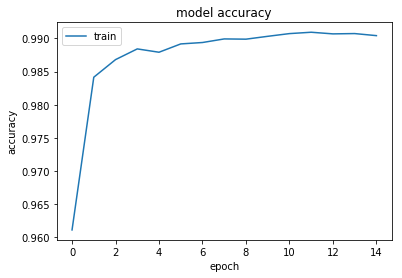

<Figure size 432x288 with 0 Axes>

In [132]:
plt.plot(hisroy.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('cnn_acc.png')

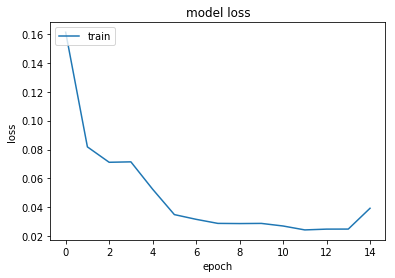

<Figure size 432x288 with 0 Axes>

In [133]:
plt.plot(hisroy.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('cnn_loss.png')

In [148]:
import array as arr
y_pred =np.asarray(y_pre)
y_pred.append(3)
y_pred.append(2)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [143]:
y_true=y_pred
y_true.append(4)
y_true.append(1)

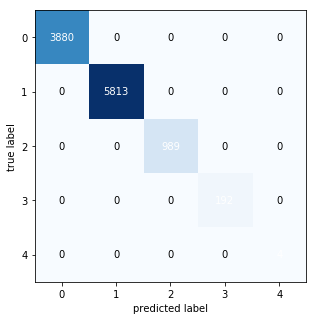

In [144]:
#confution matrix

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_true,y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [145]:
from sklearn.metrics import classification_report

print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3880
           1       1.00      1.00      1.00      5813
           2       1.00      1.00      1.00       989
           3       1.00      1.00      1.00       192
           4       1.00      1.00      1.00         4

   micro avg       1.00      1.00      1.00     10878
   macro avg       1.00      1.00      1.00     10878
weighted avg       1.00      1.00      1.00     10878

